<a href="https://colab.research.google.com/github/hyz218/Dacon_baseball/blob/master/Dacon_baseball_pre_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import numpy as np
import pandas as pd
import platform
plt.rc('font', family='NanumBarunGothic') 
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
base_path = '/content/drive/MyDrive/Colab Notebooks/KBO_prediction_data/'
pre_df = pd.read_csv(base_path+'Pre_Season_Batter.csv')
regular_df = pd.read_csv(base_path+'Regular_Season_Batter.csv')

In [4]:
pre_df.shape

(1393, 29)

In [5]:
regular_df.shape

(2454, 29)

In [6]:
pre_df.head(3)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.55,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.00,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN


In [7]:
pre_df.info() #결측치 확인을 위한 info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        1393 non-null   int64  
 1   batter_name      1393 non-null   object 
 2   year             1393 non-null   int64  
 3   team             1393 non-null   object 
 4   avg              1393 non-null   object 
 5   G                1393 non-null   int64  
 6   AB               1393 non-null   int64  
 7   R                1393 non-null   int64  
 8   H                1393 non-null   int64  
 9   2B               1393 non-null   int64  
 10  3B               1393 non-null   int64  
 11  HR               1393 non-null   int64  
 12  TB               1393 non-null   int64  
 13  RBI              1393 non-null   int64  
 14  SB               1393 non-null   int64  
 15  CS               1393 non-null   int64  
 16  BB               1393 non-null   int64  
 17  HBP           

In [8]:
display(pre_df.describe()) #이상치 확인을 위한 describe 확인

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,2.430725,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,2.698122,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,4.000000,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,24.000000,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


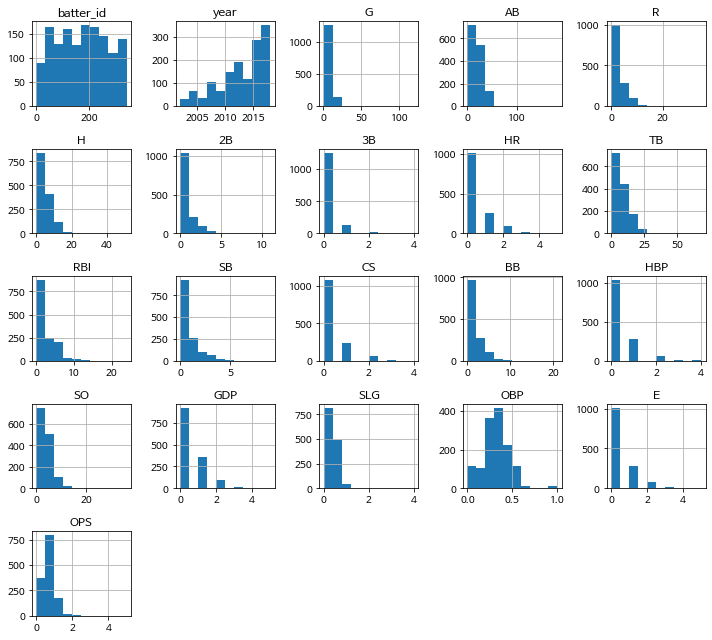

In [9]:
pre_df.hist(figsize=(10,9))
plt.tight_layout() #그래프 간격 설정
plt.show()

In [10]:
regular_player_num = regular_df.groupby('year')['batter_id'].count().rename('regular')
pre_player_num = pre_df.groupby('year')['batter_id'].count().rename('pre')

In [11]:
pd.concat([regular_player_num,pre_player_num,np.round(pre_player_num/regular_player_num,2).rename('ratio')],axis=1).T.loc[:,2002:] #2002년 부터의 정규시즌 대비 시범경기 등록 선수 비율
#시간이 지날수록 시범경기시즌 선수 수 비율이 높아지고 있음

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
pre,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [12]:
#시범경기시즌과 정규시즌에 모두 존재하는 선수만 남기기

regular_df['new_idx'] = regular_df['batter_name'] + regular_df['year'].apply(str)
pre_df['new_idx'] = pre_df['batter_name'] + pre_df['year'].apply(str)

##1. set,intersection method
intersection_idx = list(set(regular_df['new_idx']).intersection(pre_df['new_idx']))
print("intersection length: "+ str(len(intersection_idx)))

regular_new = regular_df.loc[regular_df['new_idx'].apply(lambda x: x in intersection_idx)]
regular_new = regular_new.sort_values(by = 'new_idx').reset_index(drop=True) 

pre_new = pre_df.loc[pre_df['new_idx'].apply(lambda x: x in intersection_idx)]
pre_new = pre_new.sort_values(by = 'new_idx').reset_index(drop=True)
print(regular_new.shape, pre_new.shape)
sum(regular_new['new_idx'] == pre_new['new_idx'])

intersection length: 1358
(1358, 30) (1358, 30)


1358

In [13]:
##2. inner join method 
pre_regular_innerjoin = pd.merge(regular_df['new_idx'] , pre_df['new_idx'] , how = 'inner', on = "new_idx")
innerjoin_list=pre_regular_innerjoin['new_idx'].tolist()
print("innerjoin_list length: "+ str(len(innerjoin_list)))

regular_new = regular_df[regular_df['new_idx'].isin(pre_regular_innerjoin['new_idx'].tolist())]
regular_new = regular_new.sort_values(by = 'new_idx').reset_index(drop=True) 

pre_new = pre_df[pre_df['new_idx'].isin(pre_regular_innerjoin['new_idx'].tolist())]
pre_new = pre_new.sort_values(by = 'new_idx').reset_index(drop=True) 

# 검정 코드
print(regular_new.shape, pre_new.shape)
sum(regular_new['new_idx'] == pre_new['new_idx'])

innerjoin_list length: 1358
(1358, 30) (1358, 30)


1358

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, '시범경기 시즌 OPS')

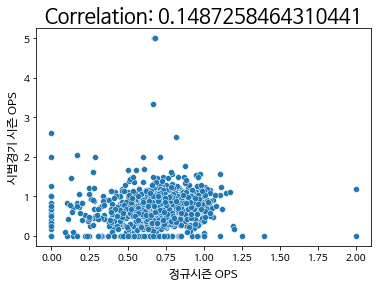

In [14]:
#정규시즌과 시범경기의 OPS 상관관계
correlation = regular_new['OPS'].corr(pre_new['OPS'])
sns.scatterplot(regular_new['OPS'],pre_new['OPS'])
plt.title('Correlation: '+str(correlation),fontsize = 20)
plt.xlabel('정규시즌 OPS',fontsize=12)
plt.ylabel('시범경기 시즌 OPS',fontsize=12)

#상관성이 매우 낮음